<a href="https://colab.research.google.com/github/MarcosVel/Machine-Learning-and-Neurons/blob/master/ClassificationPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.11.0


# Load Data

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## shape

`array([[1, 2, 3, 4], [5, 6, 7, 8]])`

returns shape `(2, 4)`

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names
# corresponding order:
# 0 = malignant
# 1 = benign

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Train test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.33
)

In [13]:
N, D = X_train.shape
X_train.shape

(381, 30)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
# loss='binary_crossentropy' goes with activation='sigmoid' and binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 70ms/step - loss: 0.6204 - accuracy: 0.6929 - val_loss: 0.6205 - val_accuracy: 0.6809
Epoch 2/100
12/12 [==============================] - 0s 19ms/step - loss: 0.5710 - accuracy: 0.7165 - val_loss: 0.5683 - val_accuracy: 0.7181
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.5274 - accuracy: 0.7454 - val_loss: 0.5228 - val_accuracy: 0.7660
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4901 - accuracy: 0.7690 - val_loss: 0.4818 - val_accuracy: 0.7979
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4562 - accuracy: 0.7900 - val_loss: 0.4466 - val_accuracy: 0.8298
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4269 - accuracy: 0.8241 - val_loss: 0.4155 - val_accuracy: 0.8564
Epoch 7/100
12/12 [==============================] - 0s 15ms/step - loss: 0.4018 - accuracy: 0.8373 - val_loss: 0.3872 - val_accuracy: 0.8670
Epoch 8/1

In [18]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 5ms/step - loss: 0.0854 - accuracy: 0.9790
Train score: [0.08539507538080215, 0.9790025949478149]
6/6 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9947
Test score: [0.07509477436542511, 0.9946808218955994]


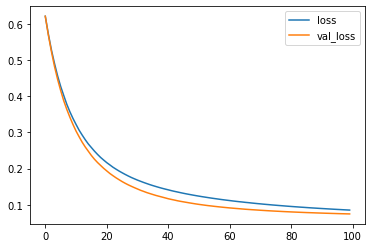

In [19]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

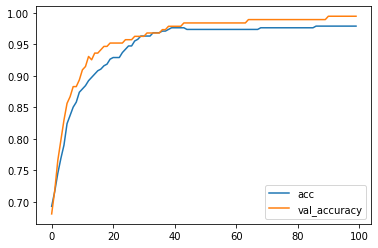

In [20]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

# Making Predictions

In [24]:
P = model.predict(X_test)
print(P)

6/6 [==============================] - 0s 2ms/step
[[9.83365715e-01]
 [7.47093260e-01]
 [9.88568366e-01]
 [4.60494757e-01]
 [9.99671817e-01]
 [9.81476665e-01]
 [9.99894083e-01]
 [9.88292277e-01]
 [9.51047719e-01]
 [9.97709751e-01]
 [2.54892886e-01]
 [9.87457097e-01]
 [9.92722690e-01]
 [9.05783415e-01]
 [7.71540552e-02]
 [3.47095123e-03]
 [9.97235596e-01]
 [9.97372806e-01]
 [8.79815221e-01]
 [8.54954356e-04]
 [9.99238253e-01]
 [9.99597609e-01]
 [9.77220058e-01]
 [9.90356147e-01]
 [9.86697912e-01]
 [9.98650014e-01]
 [1.13455823e-08]
 [2.25937739e-01]
 [9.79663312e-01]
 [9.92395639e-01]
 [9.99038041e-01]
 [9.99278724e-01]
 [9.09995914e-01]
 [6.28948629e-01]
 [6.89890325e-01]
 [2.04599361e-04]
 [3.19544645e-03]
 [8.27391669e-02]
 [9.89686430e-01]
 [8.00273180e-01]
 [1.44785736e-04]
 [9.90986586e-01]
 [2.89382751e-06]
 [9.98656392e-01]
 [4.67343925e-05]
 [4.99930903e-02]
 [9.94438171e-01]
 [9.41654384e-01]
 [8.36942434e-01]
 [9.97620702e-01]
 [9.76559162e-01]
 [9.94009495e-01]
 [9.89385128e

In [22]:
import numpy as np

In [28]:
# Round to get actual predictions
P = np.round(P).flatten()
print(P)

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.]


In [29]:
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9946808510638298
6/6 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9947
Evaluate output: [0.07509477436542511, 0.9946808218955994]
